# CASE STUDY:
## DATA EXPLORATORY ANALYSIS AND HYPOTHESIS
## TESTING FOR INSURANCE CLAIMS DATA

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Import claims_data.csv and cust_data.csv which is provided to you and -->
### combine the two datasets appropriately to create a 360-degree view of
### the data. Use the same for the subsequent questions.

In [3]:
claims_data = pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Python Foundation Case Study 3 - Insurance Claims Case Study\claims.csv")

cust_data =pd.read_csv(r"C:\Users\ronak\Desktop\Learning\AnalytixLabs\Python for Data Science\Case Studies\Python Foundation Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")

insurance_data = claims_data.merge(cust_data, how = "inner", left_on = ["customer_id"], right_on = ["CUST_ID"])

del insurance_data["CUST_ID"]

insurance_data


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver


### 2. Perform a data audit for the datatypes and find out if there are any
### mismatch within the current datatypes of the columns and their
### business significance.

In [4]:
insurance_data["claim_date"] = pd.to_datetime(insurance_data["claim_date"])
insurance_data["DateOfBirth"] = pd.to_datetime(insurance_data["DateOfBirth"])



insurance_data.dtypes


# insurance_data["DateOfBirth"].apply(lambda x: x.year )

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

In [5]:
# Converting datwes above 2000 to 19xx

insurance_data["DateOfBirth"] = np.where(pd.DatetimeIndex(insurance_data["DateOfBirth"]).year < 2000, insurance_data.DateOfBirth, insurance_data.DateOfBirth - dt.timedelta(36524.25))


In [5]:
insurance_data.describe(include = "all").fillna("-")

<ipython-input-5-13bacfda5c33>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  insurance_data.describe(include = "all").fillna("-")
<ipython-input-5-13bacfda5c33>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  insurance_data.describe(include = "all").fillna("-")


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
count,1085,1085,1085,1085,1085,1085,1085,1020,1075,1085,1085,1085,1085,1085,1085
unique,-,-,5,100,2,3,3,676,-,2,2,1078,50,1078,3
top,-,-,Other causes,2018-04-04 00:00:00,Auto,No,Material only,$2070,-,No,Male,1984-03-11 00:00:00,NY,915-698-3649,Gold
freq,-,-,285,18,970,621,653,7,-,838,556,2,31,2,375
first,-,-,-,2017-01-01 00:00:00,-,-,-,-,-,-,-,1960-01-16 18:00:00,-,-,-
last,-,-,-,2018-10-30 00:00:00,-,-,-,-,-,-,-,1999-12-27 00:00:00,-,-,-
mean,4.89155e+07,5.07679e+07,-,-,-,-,-,-,1.58698,-,-,-,-,-,-
std,2.91282e+07,2.84962e+07,-,-,-,-,-,-,1.14686,-,-,-,-,-,-
min,26832,154557,-,-,-,-,-,-,1,-,-,-,-,-,-
25%,2.40461e+07,2.64506e+07,-,-,-,-,-,-,1,-,-,-,-,-,-


In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   object        
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  gender               1085 non-null   object        
 11  DateOfBirth          1085 non-null   datetime64[ns]
 12  State                1085 non-null   object        
 13  Contact              1085 non-nul

### 3. Convert the column claim_amount to numeric. Use the appropriate
### modules/attributes to remove the $ sign.

In [7]:
insurance_data["claim_amount"] = insurance_data["claim_amount"].str.replace("$", "").astype("float")

insurance_data["claim_amount"]

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64

### 4. Of all the injury claims, some of them have gone unreported with the
### police. Create an alert flag (1,0) for all such claims.

In [8]:
insurance_data["alert_flag"] = insurance_data[insurance_data["claim_type"].str.contains("Injury", case = False) == True]["police_report"].apply(lambda x: 0 if x == "Yes" else 1 )
        
insurance_data[insurance_data["claim_type"].str.contains("Injury", case = False) == True]

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17 00:00:00,NH,419-712-8513,Gold,1.0
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,Male,1977-05-17 00:00:00,NH,419-712-8513,Gold,1.0
15,28564401,51583214,Other driver error,2017-12-10,Auto,Unknown,Material and injury,16690.0,1.0,No,Male,1999-10-31 00:00:00,NH,743-486-5264,Platinum,1.0
18,67257404,18288638,Other driver error,2018-04-24,Auto,Yes,Injury only,32560.0,1.0,No,Female,1969-01-14 18:00:00,MI,314-135-1359,Platinum,0.0
21,7809917,63916778,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,Male,1966-09-07 18:00:00,IL,146-157-4572,Platinum,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,56358443,75934330,Natural causes,2017-01-01,Auto,Yes,Injury only,20630.0,1.0,No,Female,1987-10-09 00:00:00,ME,951-941-3975,Platinum,0.0
1068,57326503,29854604,Other driver error,2018-07-20,Auto,No,Material and injury,44033.5,1.0,Yes,Male,1975-09-02 00:00:00,WI,214-457-4352,Gold,1.0
1072,50800999,51669975,Other causes,2018-09-19,Home,Yes,Injury only,38950.0,1.0,No,Female,1988-02-05 00:00:00,ND,975-463-9541,Silver,0.0
1074,36599575,87596868,Driver error,2018-10-09,Auto,Unknown,Injury only,33330.0,2.0,No,Male,1961-11-18 18:00:00,AZ,573-396-3182,Silver,1.0


### 5. One customer can claim for insurance more than once and in each claim,
### multiple categories of claims can be involved. However, customer ID
### should remain unique.
### Retain the most recent observation and delete any duplicated records in
### the data based on the customer ID column.

In [9]:
insurance_data = insurance_data.sort_values(by = ["claim_date"], ascending = False)

insurance_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,Male,1967-09-08 18:00:00,ME,134-785-1687,Gold,1.0
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,Female,1976-05-20 00:00:00,NE,271-123-1475,Gold,NaN
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,Male,1968-04-22 18:00:00,FL,673-574-7823,Gold,NaN
941,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,Male,1977-04-28 00:00:00,MO,962-834-9361,Gold,NaN
322,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,Female,1986-03-18 00:00:00,AK,436-934-7156,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,Female,1999-08-05 00:00:00,NH,649-592-8793,Platinum,1.0
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,Female,1993-08-13 00:00:00,TN,396-973-2531,Gold,1.0
195,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,Female,1974-02-14 00:00:00,NM,918-174-7461,Silver,1.0
177,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,Male,1985-11-16 00:00:00,TX,392-739-4873,Gold,NaN


In [10]:
insurance_data.drop_duplicates(subset = ["customer_id"], keep = "first", inplace = True)

insurance_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,Male,1967-09-08 18:00:00,ME,134-785-1687,Gold,1.0
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,Female,1976-05-20 00:00:00,NE,271-123-1475,Gold,NaN
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,Male,1968-04-22 18:00:00,FL,673-574-7823,Gold,NaN
941,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,Male,1977-04-28 00:00:00,MO,962-834-9361,Gold,NaN
322,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,Female,1986-03-18 00:00:00,AK,436-934-7156,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,Female,1999-08-05 00:00:00,NH,649-592-8793,Platinum,1.0
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,Female,1993-08-13 00:00:00,TN,396-973-2531,Gold,1.0
195,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,Female,1974-02-14 00:00:00,NM,918-174-7461,Silver,1.0
177,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,Male,1985-11-16 00:00:00,TX,392-739-4873,Gold,NaN


### 6. Check for missing values and impute the missing values with an
### appropriate value. (mean for continuous and mode for categorical)

In [11]:
insurance_data.isnull().sum()

claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
alert_flag             647
dtype: int64

In [12]:
insurance_data["claim_amount"].fillna(value = insurance_data["claim_amount"].mean(), inplace = True)

insurance_data["total_policy_claims"].fillna(value = insurance_data["total_policy_claims"].mean(), inplace = True)


### 7. Calculate the age of customers in years. Based on the age, categorize the
### customers according to the below criteria
#### Children < 18
#### Youth 18-30
#### Adult 30-60
#### Senior > 60

In [13]:
from datetime import datetime, date

def age(cust):
    cust = datetime.date(cust)
    today = date.today()
    return today.year - cust.year - ((today.month, today.day) < (cust.month, cust.day))
  
insurance_data['Age'] = insurance_data['DateOfBirth'].apply(age)

insurance_data



,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,Age
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,Male,1967-09-08 18:00:00,ME,134-785-1687,Gold,1.0,53
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,Female,1976-05-20 00:00:00,NE,271-123-1475,Gold,NaN,45
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,Male,1968-04-22 18:00:00,FL,673-574-7823,Gold,NaN,53
941,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,Male,1977-04-28 00:00:00,MO,962-834-9361,Gold,NaN,44
322,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,Female,1986-03-18 00:00:00,AK,436-934-7156,Silver,NaN,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.000000,1.0,No,Female,1999-08-05 00:00:00,NH,649-592-8793,Platinum,1.0,21
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,Female,1993-08-13 00:00:00,TN,396-973-2531,Gold,1.0,27
195,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.000000,1.0,No,Female,1974-02-14 00:00:00,NM,918-174-7461,Silver,1.0,47
177,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,Male,1985-11-16 00:00:00,TX,392-739-4873,Gold,NaN,35


In [14]:
def category(age):
    if age < 18:
        return "Children"
    elif age < 30:
        return "Youth"
    elif age < 60:
        return "Adult"
    else:
        return "Senior"
    
insurance_data['Cust_Category'] = insurance_data["Age"].apply(category)

insurance_data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,Age,Cust_Category
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,Male,1967-09-08 18:00:00,ME,134-785-1687,Gold,1.0,53,Adult
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,Female,1976-05-20 00:00:00,NE,271-123-1475,Gold,NaN,45,Adult
1055,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.000000,1.0,No,Male,1968-04-22 18:00:00,FL,673-574-7823,Gold,NaN,53,Adult
941,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,Male,1977-04-28 00:00:00,MO,962-834-9361,Gold,NaN,44,Adult
322,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,12501.726555,2.0,No,Female,1986-03-18 00:00:00,AK,436-934-7156,Silver,NaN,35,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.000000,1.0,No,Female,1999-08-05 00:00:00,NH,649-592-8793,Platinum,1.0,21,Youth
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.000000,1.0,No,Female,1993-08-13 00:00:00,TN,396-973-2531,Gold,1.0,27,Youth
195,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.000000,1.0,No,Female,1974-02-14 00:00:00,NM,918-174-7461,Silver,1.0,47,Adult
177,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,Male,1985-11-16 00:00:00,TX,392-739-4873,Gold,NaN,35,Adult


#### 8. What is the average amount claimed by the customers from various
#### segments?

In [15]:
insurance_data[["Segment", "claim_amount"]].groupby(by = ["Segment"])["claim_amount"].mean()

Segment
Gold        12846.400227
Platinum    12371.654843
Silver      12267.859374
Name: claim_amount, dtype: float64

#### 9. What is the total claim amount based on incident cause for all the claims
#### that have been done at least 20 days prior to 1st of October, 2018.

In [16]:
incident = insurance_data[insurance_data["claim_date"] <= "2018-09-11"]

incident[["incident_cause", "claim_amount"]].groupby(by = ["incident_cause"])["claim_amount"].sum()

incident_cause
Crime                 7.219386e+05
Driver error          3.315851e+06
Natural causes        1.312987e+06
Other causes          3.723152e+06
Other driver error    3.277536e+06
Name: claim_amount, dtype: float64

#### 10. How many adults from TX, DE and AK claimed insurance for driver
#### related issues and causes?

In [17]:
cust_driver = insurance_data[["customer_id", "State", "claim_type", "Cust_Category"]][insurance_data["Cust_Category"] == "Adult"]

cust_driver = cust_driver[(cust_driver["State"] == "TX") | (cust_driver["State"] == "DE") | (cust_driver["State"] == "AK")]

cust_driver.customer_id.count()

54

#### 11. Draw a pie chart between the aggregated value of claim amount based
#### on gender and segment. Represent the claim amount as a percentage on
#### the pie chart.

In [18]:
claim_gen = insurance_data[["gender","Segment", "claim_amount"]].groupby(by = ["gender", "Segment"])["claim_amount"].sum()

claim_gen = claim_gen.reset_index()

claim_gen

,gender,Segment,claim_amount
0,Female,Gold,2.110045e+06
1,Female,Platinum,2.369722e+06
2,Female,Silver,1.897545e+06
3,Male,Gold,2.655970e+06
4,Male,Platinum,2.096445e+06
5,Male,Silver,2.347134e+06


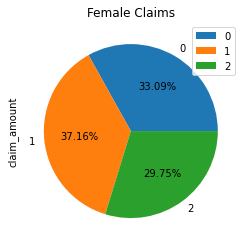

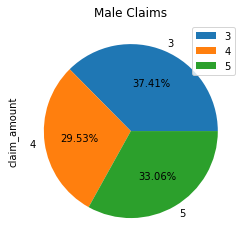

In [170]:
claim_gen[claim_gen["gender"] == "Female"].plot(y = "claim_amount", kind = "pie", autopct = "%0.2f%%")
plt.title("Female Claims")
plt.show()

claim_gen[claim_gen["gender"] == "Male"].plot(y = "claim_amount", kind = "pie", autopct = "%0.2f%%")
plt.title("Male Claims")
plt.show()


#### 12. Among males and females, which gender had claimed the most for any
#### type of driver related issues? E.g. This metric can be compared using a
#### bar chart

In [19]:
driver = insurance_data[["gender","incident_cause", "claim_amount"]][insurance_data["incident_cause"].str.contains("Driver", case = False) == True]

driver = driver.groupby(by = ["gender", "incident_cause"])["claim_amount"].sum()

driver.reset_index()

,gender,incident_cause,claim_amount
0,Female,Driver error,1.039850e+06
1,Female,Other driver error,2.096868e+06
2,Male,Driver error,2.554088e+06
3,Male,Other driver error,1.421324e+06


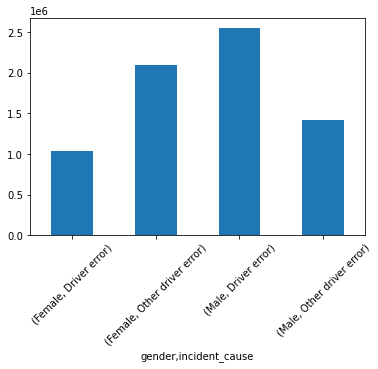

In [26]:
driver.plot(x = ["gender"], y = ["claim_amount"], kind = "bar")
plt.xticks(rotation = 45)
plt.show()

#### 13. Which age group had the maximum fraudulent policy claims? Visualize
#### it on a bar chart.

In [20]:
fraud = insurance_data[[ "Cust_Category", "total_policy_claims", "fraudulent"]][insurance_data["fraudulent"] == "Yes"]

fraud = fraud.groupby(by = ["Cust_Category"])["total_policy_claims"].sum().reset_index()

fraud = fraud.set_index(["Cust_Category"])

fraud

,total_policy_claims
Cust_Category,
Adult,310.588951
Senior,20.000000
Youth,95.000000


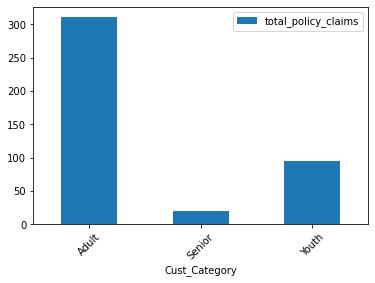

In [49]:
fraud.plot(y =["total_policy_claims"], kind = "bar")
plt.xticks(rotation = 45)
plt.show()

#### 14. Visualize the monthly trend of the total amount that has been claimed
#### by the customers. Ensure that on the “month” axis, the month is in a
#### chronological order not alphabetical order.

In [21]:
monthly_claim = insurance_data[["claim_date", "claim_amount"]]. groupby(by = ["claim_date"])["claim_amount"].sum().reset_index()

monthly_claim = monthly_claim.set_index("claim_date")

monthly_claim

,claim_amount
claim_date,
2017-01-01,203227.000000
2017-01-07,135383.500000
2017-01-14,138807.500000
2017-01-21,72638.953110
2017-01-27,57959.226555
...,...
2018-10-03,187868.726555
2018-10-09,225007.500000
2018-10-16,119829.000000


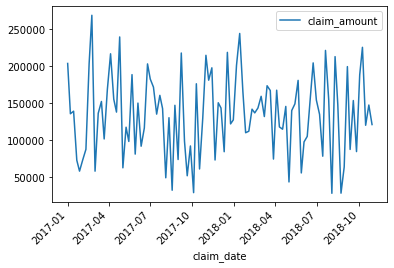

In [109]:
monthly_claim.plot(y = ["claim_amount"], kind = "line")
plt.xticks(rotation = 45)
plt.show()

#### 15. What is the average claim amount for gender and age categories and
#### suitably represent the above using a facetted bar chart, one facet that
#### represents fraudulent claims and the other for non-fraudulent claims.

In [22]:
avg_claim = insurance_data[["gender", "Cust_Category", "fraudulent", "claim_amount"]].groupby(by = ["gender", "Cust_Category", "fraudulent"])["claim_amount"].mean().reset_index()

avg_claim

,gender,Cust_Category,fraudulent,claim_amount
0,Female,Adult,No,12097.396811
1,Female,Adult,Yes,12497.764461
2,Female,Senior,No,12386.690622
3,Female,Senior,Yes,2643.357143
4,Female,Youth,No,13301.097301
5,Female,Youth,Yes,8283.558592
6,Male,Adult,No,12194.945982
7,Male,Adult,Yes,15439.691661
8,Male,Senior,No,13948.333333
9,Male,Senior,Yes,28232.500000


In [23]:
avg_claim["Gender_category"] = avg_claim["gender"] + "-" +  avg_claim["Cust_Category"]

avg_claim

,gender,Cust_Category,fraudulent,claim_amount,Gender_category
0,Female,Adult,No,12097.396811,Female-Adult
1,Female,Adult,Yes,12497.764461,Female-Adult
2,Female,Senior,No,12386.690622,Female-Senior
3,Female,Senior,Yes,2643.357143,Female-Senior
4,Female,Youth,No,13301.097301,Female-Youth
5,Female,Youth,Yes,8283.558592,Female-Youth
6,Male,Adult,No,12194.945982,Male-Adult
7,Male,Adult,Yes,15439.691661,Male-Adult
8,Male,Senior,No,13948.333333,Male-Senior
9,Male,Senior,Yes,28232.500000,Male-Senior


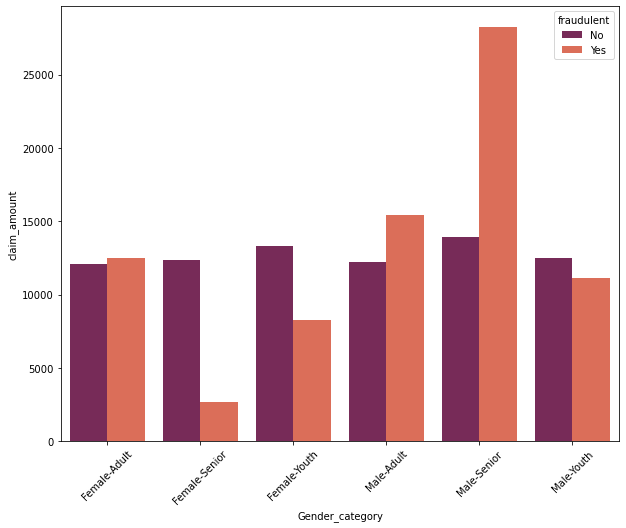

In [126]:
fig_dims = (10,8)
fig,ax = plt.subplots(figsize = fig_dims)
sns.barplot(x= "Gender_category", y = "claim_amount", hue = "fraudulent", data = avg_claim, palette = "rocket")
plt.xticks(rotation = 45)
plt.show()

##### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. 
##### Please include a detailedwrite-up on the parameters taken into consideration, the Hypothesis testing steps, 
##### conclusion from the p-values and the business implications of the statements.

In [31]:
import scipy.stats as stats

##### 16. Is there any similarity in the amount claimed by males and females?

Ho: Males claim amount = Female claim amount
Ha: Male claim amount <> Female claim amount

In [30]:
Male = insurance_data["claim_amount"][insurance_data["gender"] == "Male"]
Female = insurance_data["claim_amount"][insurance_data["gender"] == "Female"]

In [33]:
stats.ttest_ind(Male, Female)

Ttest_indResult(statistic=0.9625093446632118, pvalue=0.33601006135365463)

P-value > 0.05 so we can'reject null hypothesis. So we can say that there is similarity is claim amount of male and female.

#### 17. Is there any relationship between age category and segment?

Ho: chi square = 0 --> There is no relationship between age category and segment
Ha: chi square <> 0 --> There is relationship between age category and segment

In [37]:
rel = insurance_data[["Segment", "Cust_Category"]]
rel.head()

,Segment,Cust_Category
286,Gold,Adult
354,Gold,Adult
1055,Gold,Adult
941,Gold,Adult
322,Silver,Adult


In [40]:
cts = pd.crosstab(rel["Segment"], rel["Cust_Category"], margins = True)
cts 

Cust_Category,Adult,Senior,Youth,All
Segment,,,,
Gold,284,9,78,371
Platinum,260,16,85,361
Silver,250,13,83,346
All,794,38,246,1078


In [41]:
stats.chi2_contingency(cts)

(3.6266346206991176,
 0.9342263084518336,
 9,
 array([[ 273.25974026,   13.07792208,   84.66233766,  371.        ],
        [ 265.89424861,   12.72541744,   82.38033395,  361.        ],
        [ 254.84601113,   12.19666048,   78.95732839,  346.        ],
        [ 794.        ,   38.        ,  246.        , 1078.        ]]))

P-value > 0.05 so we can't reject NULL hypothesis so we can say that there is NO relationship between age category and segment

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was 10,000.

In [38]:
yr_comp = insurance_data[["claim_amount", "claim_date"]]
yr_comp.head()

,claim_amount,claim_date
286,42124.500000,2018-10-30
354,1940.000000,2018-10-30
1055,2420.000000,2018-10-30
941,1830.000000,2018-10-30
322,12501.726555,2018-10-30


In [40]:
yr_comp["Year"] = yr_comp.claim_date.apply(lambda x: x.strftime("%Y"))

yr_comp.head()

<ipython-input-40-e6dac6e436aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr_comp["Year"] = yr_comp.claim_date.apply(lambda x: x.strftime("%Y"))


,claim_amount,claim_date,Year
286,42124.500000,2018-10-30,2018
354,1940.000000,2018-10-30,2018
1055,2420.000000,2018-10-30,2018
941,1830.000000,2018-10-30,2018
322,12501.726555,2018-10-30,2018


In [41]:
avg_yr =yr_comp.claim_amount[yr_comp.Year == yr_comp.Year.max()]
avg_yr

286     42124.500000
354      1940.000000
1055     2420.000000
941      1830.000000
322     12501.726555
            ...     
185      1850.000000
723      2740.000000
583     44838.500000
308      2240.000000
729      2120.000000
Name: claim_amount, Length: 485, dtype: float64

In [42]:
stats.ttest_1samp(avg_yr, 10000)

Ttest_1sampResult(statistic=4.477343563243787, pvalue=9.43584422198333e-06)

In [45]:
yr_mean = round(avg_yr.mean(),2)

print(f"Current year sample mean: {yr_mean}")

Current year sample mean: 12743.44


### 19. Is there any difference between age groups and insurance claims?

In [25]:
age_grp = insurance_data[["Cust_Category", "total_policy_claims"]]

age_grp.head()

,Cust_Category,total_policy_claims
286,Adult,1.0
354,Adult,1.0
1055,Adult,1.0
941,Adult,1.0
322,Adult,2.0


In [28]:
Adult = age_grp.total_policy_claims[age_grp.Cust_Category == "Adult"]
Youth = age_grp.total_policy_claims[age_grp.Cust_Category == "Youth"]
Senior = age_grp.total_policy_claims[age_grp.Cust_Category == "Senior"]

In [32]:
stats.f_oneway(Adult,Youth,Senior)

F_onewayResult(statistic=1.067050883860815, pvalue=0.34438566755080136)

### 20. Is there any relationship between total number of policy claims and the claimed amount?

In [35]:
policy = insurance_data[["total_policy_claims", "claim_amount"]]
policy.head()

,total_policy_claims,claim_amount
286,1.0,42124.500000
354,1.0,1940.000000
1055,1.0,2420.000000
941,1.0,1830.000000
322,2.0,12501.726555


In [36]:
stats.pearsonr(policy["total_policy_claims"],policy["claim_amount"])

(-0.021909487420303755, 0.47238499876383927)